# Scipy Module - Statistics and the Like

In [2]:
import os
import matplotlib.pyplot as plt
os.getcwd()

'E:\\04-Miscellaneous Work\\14-Python Jupyter'

One common question to ask for is: **given a sample of a random variable, what is its probability density?**

## Importing the norm module

In [3]:
from scipy.stats import norm

The following examples were driven on the basis of Probability Density Function (PDF) and Cumulative Distribution Function (CDF). As a refresher:
- a PDF is used to specify the probability of a random variable falling within a particular range of values, as opposed to taking on any one value
- of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x.

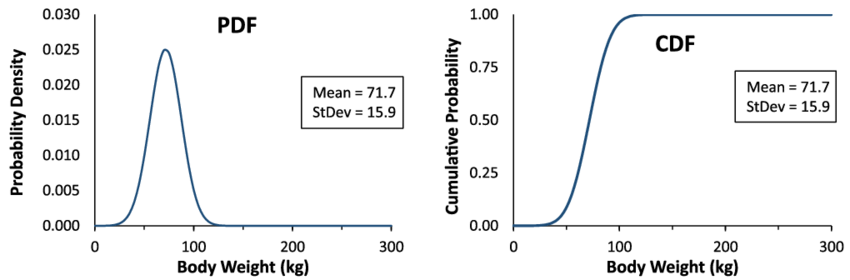

In [4]:
from IPython.display import Image
Image("./Example-of-a-normal-distribution-expressed-both-as-a-probability-density-function-PDF.png")

Finding the probability density of '0' from the standard normal distribution (mean is assumed to be 0, and variance is assumed to be 1)

In [5]:
norm.pdf(0)

0.3989422804014327

Finding the PDF of '0' in a distribution with different mean and standard deviation.
- the argument **loc=** determines the mean of the PDF, and
- the argument **scale=** determines the variance of the PDF

In [6]:
norm.pdf(0, loc = 5, scale = 10)

0.03520653267642995

## Calculating the PDF of a random array of values

### Calculating PDFs

In [7]:
import numpy as np
r = np.random.random(10)
r

array([0.66802288, 0.9229761 , 0.65012362, 0.2293873 , 0.7634576 ,
       0.75090515, 0.10829252, 0.51930799, 0.3089302 , 0.88265428])

Rather than calculating the PDF values of the random numbers using for loop, scipy allows for a more efficient calculation:

In [8]:
norm.pdf(r)

array([0.31915902, 0.26057072, 0.32294641, 0.38858327, 0.29808629,
       0.30093295, 0.39660987, 0.34861786, 0.38035226, 0.27023108])

Often, it is useful to calculate the log of a PDF instead.

**NOTE:** Since the formula of a Gaussian distribution has an exponential, it goes away when it is logged. The multiplication process also becomes a summation process, i.e:

\begin{align}
p(x_1, x_2,...,x_n) = \prod_{i=1}^{n}p(x_i)
\end{align}

When logged, this becomes:

\begin{align}
log p(x_1, x_2,...,x_n)= \sum_{i=1}^{n} p(x_i)
\end{align}

**NOTE:** Remember how $R = x_1*x_2*...*x_n$
,becomes:
$log R = log(x_1) + log(x_2) + ... + log(x_n)$
when both sides of the equation is logged. 

Similarly, in the case of the Gaussian PDF formula, which is:

\begin{align}
f(x|\mu,\delta^2) = \frac{1}{\sqrt{2\delta^2\pi}}.e^{-\frac{(x-\mu)^2}{2\delta^2}}
\end{align}

When logged, this becomes:

\begin{align}
log p(x) = -\frac{1}{2} log(2\pi\delta^2) - \frac{1}{2} \frac{(x-\mu)^2}{\delta^2}
\end{align}

**NOTE:** The exponent 'e' goes away when the formula is logged

In most cases, a summation operation is almost always more efficient -computer memory wise- than a multiplication (product) operations. This is because a multiplication is a **retainer** operation, whereas a summation is not.

A function to calculate just the above (log of PDF) in Scipy is:

In [9]:
norm.logpdf(r)

array([-1.14206581, -1.34488097, -1.13026889, -0.9452478 , -1.21037229,
       -1.20086781, -0.92480217, -1.05377893, -0.96665747, -1.30847782])

### Calculating CDFs

Refer back to the PDF and CDF graph above. A CDF is essentially the integral of $-\infty$ to $x$, which is not mathematically solvable (since there's no expression for it?). However, it is possible to express them numerically in Python.

**The function to calculate the CDFs is very much like the the function to calculate the PDFs:**

In [10]:
norm.cdf(r)

array([0.7479405 , 0.82199017, 0.74219381, 0.59071605, 0.77740473,
       0.77364513, 0.54311817, 0.69822701, 0.62131269, 0.81128845])

In [11]:
norm.logcdf(r)

array([-0.29043184, -0.19602684, -0.29814487, -0.52641984, -0.25179418,
       -0.256642  , -0.61042836, -0.359211  , -0.4759208 , -0.20913161])

## Sampling from a Gaussian Distribution

Sampling from a standard normal distribution example:

In [12]:
r = np.random.randn(10000)

Plotting the vector r, to verify that the mean of the above vector is '0', and represents a standard normal distribution

(array([  1.,   2.,   0.,   3.,   1.,   4.,   3.,   9.,   6.,   7.,   3.,
          9.,  14.,  10.,  14.,  14.,  11.,  24.,  21.,  24.,  38.,  43.,
         47.,  45.,  56.,  51.,  80.,  75., 103.,  91., 139., 138., 143.,
        152., 157., 169., 194., 171., 219., 210., 221., 256., 246., 288.,
        308., 279., 275., 305., 256., 321., 272., 289., 288., 298., 247.,
        245., 236., 221., 228., 221., 193., 185., 185., 178., 155., 151.,
        142., 119., 112., 110.,  80.,  72.,  68.,  66.,  60.,  55.,  41.,
         37.,  33.,  23.,  22.,  18.,  19.,  14.,  11.,   6.,   8.,   6.,
          2.,   4.,   8.,   2.,   3.,   1.,   0.,   2.,   4.,   1.,   2.,
          1.]),
 array([-3.54674593, -3.47466222, -3.40257851, -3.3304948 , -3.25841109,
        -3.18632738, -3.11424367, -3.04215996, -2.97007625, -2.89799254,
        -2.82590883, -2.75382512, -2.68174141, -2.6096577 , -2.53757399,
        -2.46549028, -2.39340657, -2.32132286, -2.24923915, -2.17715544,
        -2.10507173, -2.03

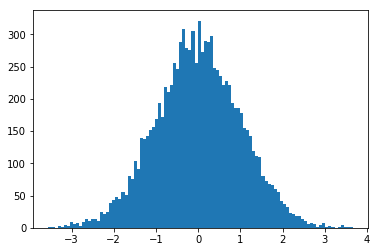

In [13]:
plt.hist(r, bins = 100)

But what if we want to sample from a Gaussian distribution, with an arbitrary **mean** and **standard deviation**? This can be done by:
+ Scaling the above distribution by a factor that we want for the standard distribution **(multiplying it)**, and
+ **Adding the number that we want for the mean** to the array

Redoing the distribution of r to be as follows:

In [14]:
r = 10*np.random.randn(100000) + 5

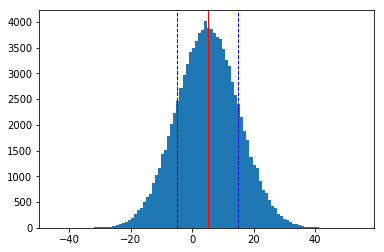

In [15]:
plt.hist(r, bins = 100)

#Plots the mean and standard deviation of the distribution against the histogram
plt.axvline(x=r.mean(), color = 'red', lw = 1)
plt.axvline(x=r.mean()+r.std(), color = 'blue', ls = 'dashed', lw = 1)
plt.axvline(x=r.mean()-r.std(), color = 'blue', ls = 'dashed', lw = 1)

The actual mean for the array r is:

In [16]:
r.mean()

5.024004223438342

Whereas its actual standard deviation is:

In [17]:
r.std()

10.047198806156263

## Sampling from a Gaussian Distribution (Spherical and Axis-aligned Ellipses)

A 2D spherical Gaussian is a Gaussian distribution, whose columns/ dimension (both of the 2 columns), has a mean of 0, and a variance of 1. Each dimension is uncorrelated, and independent of the other, and they all have the same variance.

In [18]:
r = np.random.randn(10000,2)

When plotted together in a scatter plot, the data should be spread out in a circle.

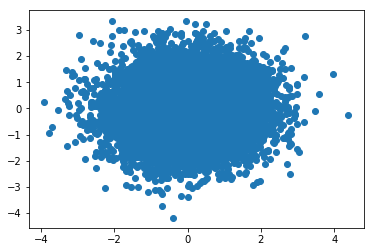

In [19]:
plt.scatter(r[:,0],r[:,1])

To have a 2D elliptical Gaussian (a Gaussian distribution, where the columns/ dimension do not have the same mean and variance), we could just scale the other dimension of the vector array. See the below example, where the second column is given the following attribute:
+ a Standard deviation of **5**, and
+ a mean of **2**

In [20]:
r[:,1] = 5*r[:,1] + 2

Redoing the scatter plot between the first, and second column of r, we have the following plot:

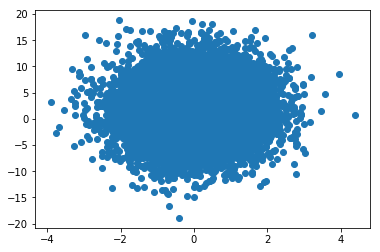

In [21]:
plt.scatter(r[:,0], r[:,1])

It's not obvious that the plot between column 1 and 2 of the array r is elliptical. This is because by default, matplotlib scales the axes of x and y to give a 'balanced' look to the data distribution.

To make it more obvious (that the plot is elliptical), it is possible to modify the scale of both axis through the following argument:

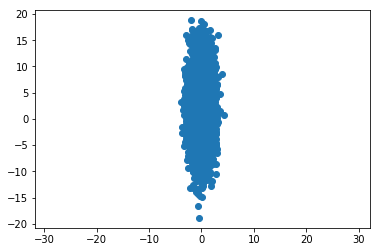

In [22]:
plt.axis('equal')
plt.scatter(r[:,0], r[:,1])

## Sampling from a General Multivariate Normal

Sampling from a general multivariate normal distribution, where the dimensions are **not independent** from one another (**consequently, this means that 'variates' or variables in this data table possess a covariance matrix**)

In [23]:
cov = np.array([[1,0.8], [0.8,3]])

The above means that we have:
+ a variance of 1 in the first dimension, 
+ a variance of 3 in the second dimension, and
+ a co-variance between the two variates of 0.8

Importing a module for the multivariate normal:

In [24]:
from scipy.stats import multivariate_normal as mvn

Assigning a mean to the array of values:

In [25]:
mu = np.array([0,2])

Checkout the scipy documentation for the function 'rvs': 

In [26]:
r = mvn.rvs(mean = mu, cov = cov, size = 1000)

Creating a scatterplot, to see that the first and second dimension of the multi-variate array is really correlated:

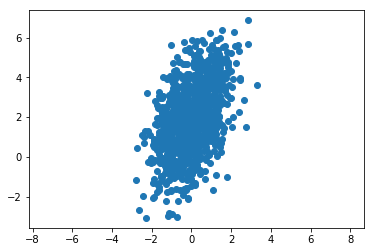

In [30]:
plt.axis('equal')
plt.scatter(r[:,0], r[:,1])

**NOTE:** It is also possible to create a general multivariate normal samples with numpy with the following code:

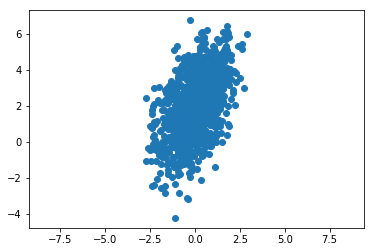

In [32]:
r = np.random.multivariate_normal(mean = mu, cov = cov, 
                                  size = 1000)
plt.axis('equal')
plt.scatter(r[:,0], r[:,1])

## Other Interesting Scipy Function

General functions for other uses (see their individual documentations in scipy.org):
+ reading in matlab format datasets (.mat): scipy.io.loadmat()
+ reading in sound files, stored as WAV (.wav):
    + read: scipy.io.wavfile.read()
    + write: scipy.io.wavfile.write()
+ reading signal processing files (for convolutioned neural networks): (scipy.signal)

Creating a sine-wave for purposes of exemplifying the use of scipy.signal:

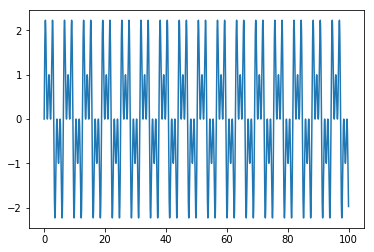

In [33]:
x = np.linspace(0,100,10000)
y = np.sin(x) + np.sin(3*x) + np.sin(5*x)

plt.plot(x,y)

Basically the above plot shows a periodic wave with multiple frequency components